# Visualising and Preparing the data

In [69]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [70]:
df_main = pd.read_csv('.spyder-py3/titanic_dataset.csv')

In [71]:
df_main.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df_main.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [73]:
'''
survival   :  Survival 
PassengerId:  Unique id of passenger
Pclass     :  Ticket Class
sex        :  Sex     
Age        :  Age in years     
sibsp      :  no. of siblings / spouses aboard the Titanic     
parch      :  no. of parents / children aboard the Titanic     
ticket     :  Ticket number     
fare       :  Passenger fare     
cabin      :  Cabin number     
embarked   :  Port of Embarkation
'''

print(df_main.info())
df_main.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* So from here we can already make that out of total 38% people survived 
* And the ages range from 0.4 to 80 years
* Age attribute has some missing values
* Embarked attribute has just 2 missing values
* Also cabin has lot of missing values so we might just drop it along with few more attributes

In [74]:
# dropping columns not helpful in prediction
df = df_main.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Filling missing values

In [75]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* Here S value is maximum 

In [76]:
df.fillna({'Age':df.Age.mean(),'Embarked':'S'},inplace=True)

### Exploring about relationship between features and target values

In [77]:
# Sex
df[['Sex','Survived']].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


* From here we can see females have the more survival rate than males

In [78]:
# Pclass
df[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


* Here we can see that more first class people managed to survive than the second class and third class just had the survival rate of 24%

In [79]:
df.groupby(['Pclass', 'Survived', 'Sex']).size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

* This tells us how many males and females survived and how many didn't in each class

In [80]:
# Fare
df.Fare.agg(['max','min','mean','median'])

max       512.329200
min         0.000000
mean       32.204208
median     14.454200
Name: Fare, dtype: float64

Here the minimum fare paid is zero and maximum is 512, hence some people travelled free

In [81]:
df[df.Fare==0.0].Survived.value_counts()

0    14
1     1
Name: Survived, dtype: int64

* So only one was able to survive

In [82]:
# Embarked
df[df.Embarked=='S'].Survived.value_counts()

0    427
1    219
Name: Survived, dtype: int64

In [83]:
df[df.Embarked=='C'].Survived.value_counts()

1    93
0    75
Name: Survived, dtype: int64

In [84]:
df[df.Embarked=='Q'].Survived.value_counts()

0    47
1    30
Name: Survived, dtype: int64

In [85]:
# Parch
df[['Parch','Survived']].groupby('Parch',as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


* Parents with one children managed to survive most

In [86]:
# Sibsp
df[['SibSp','Survived']].groupby('SibSp',as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


* So the ones with just one sibling/spouses managed to survive most

### Changing into numeric data 

In [87]:
labelEncoder = LabelEncoder()
df['Sex'] = labelEncoder.fit_transform(df['Sex'])
df['Embarked'] = labelEncoder.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [88]:
#OneHotEncoding
#df1 = pd.get_dummies(df[['Sex','Embarked']])
#df = df.select_dtypes(exclude=['object']) 
#df = pd.concat((df1,df),axis=1) 

In [89]:
y = df['Survived'] # target values
X = df[df.columns.values[1:]] # features
df = pd.concat([X, y],axis=1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0


### Finding Correlation between the features and target values...

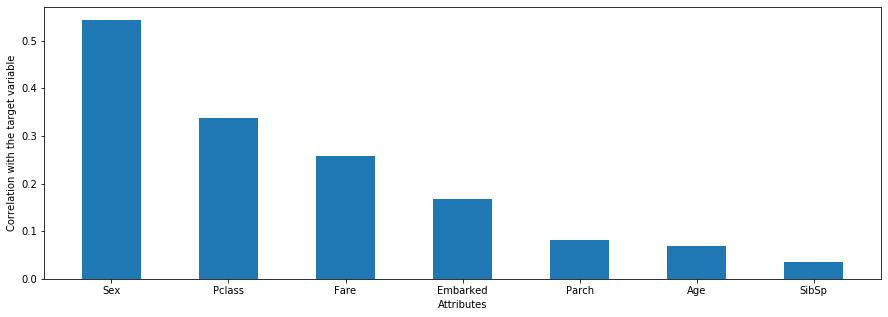

In [90]:
# Calculate correlation between every column on the data
corr = df.corr('pearson')

# Take absolute values of correlations
corrs = [abs(corr[attr]['Survived'])for attr in list(X)]

# Make a list of pairs [(corr,feature)]
l = list(zip(corrs, list(X)))

# Sort the list of pairs in reverse/descending order,
# with the correlation value as the key for sorting
l.sort(key = lambda x: x[0], reverse=True)

# "unzip" pairs to two lists
# zip(*l) takes a list that looks like [[a,b,c], [d,e,f], [g,h,i]]
# and returns [[a,d,g],[b,e,h], [c,f,i]]
corrs, labels = list(zip((*l)))

# Plot correlations with respect to the target variable as a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index, corrs, width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index,labels)
plt.show()

### Splitting the data into test and train

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

### Finding feature importance

{'Pclass': 0.0829067070464966, 'Sex': 0.2575898330670277, 'Age': 0.26737688473729065, 'SibSp': 0.05033085651721876, 'Parch': 0.03923373771499622, 'Fare': 0.26732688116165626, 'Embarked': 0.03523509975531367}


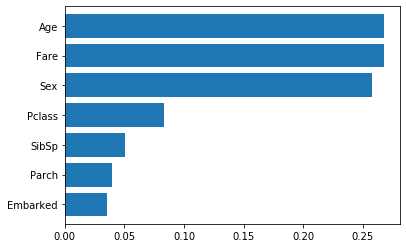

In [92]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
feature_importance = {}
for i in range(7):
    feature_importance[X.columns.values[i]] = rf.feature_importances_[i]
print(feature_importance)

pd.Series(rf.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)

### So if we analyze the correlation values and feature importances the most important features come out to be:
##                                    'Sex', 'Fare', 'Age' and 'Pclass'

In [93]:
# our new training set
X_train = X_train.drop(['SibSp', 'Parch', 'Embarked'], axis=1)
X_test = X_test.drop(['SibSp', 'Parch', 'Embarked'], axis=1)
X_train.head()

,Pclass,Sex,Age,Fare
140,3,0,29.699118,15.2458
439,2,1,31.000000,10.5000
817,2,1,31.000000,37.0042
378,3,1,20.000000,4.0125
491,3,1,21.000000,7.2500


### Data normalization (Feature Scaling)

In [94]:
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.fit_transform(X_test)
print(X_train)

[[1.         0.         0.36592862 0.02975782]
 [0.5        1.         0.38232699 0.02049464]
 [0.5        1.         0.38232699 0.07222739]
 ...
 [1.         1.         0.36592862 0.0150944 ]
 [1.         0.         0.44535485 0.03396254]
 [0.5        1.         0.74788857 0.07612293]]


### Building models for titanic dataset

In [95]:
#Logistic Regression
lr = LogisticRegression(C = 1, random_state = 0)
lr.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
lr_pred = lr.predict(X_test)

In [97]:
lr_acc = accuracy_score(y_test, lr_pred)
lr_acc_per = round(lr_acc, 3)*100
print('Accuracy after Logistic Regression: ', lr_acc_per, '%')

cm = confusion_matrix(y_test, lr_pred)
print('Confusion matrix (Logistic Regression):')
print(cm)

Accuracy after Logistic Regression:  79.9 %
Confusion matrix (Logistic Regression):
[[95 15]
 [21 48]]


In [98]:
# Random Forest Classification
rf = RandomForestClassifier(criterion='entropy', n_estimators = 500, random_state = 0, n_jobs = -1)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_acc_per = round(rf_acc, 3)*100
print('Accuracy after Random Forest Classification: ', rf_acc_per, '%')

cm = confusion_matrix(y_test, rf_pred)
print('Confusion matrix (Random Forest Classification):')
print(cm)

Accuracy after Random Forest Classification:  81.0 %
Confusion matrix (Random Forest Classification):
[[104   6]
 [ 28  41]]


In [99]:
# Support Vector Machine Classification
svc = SVC(gamma = 'auto')
svc.fit(X_train,y_train)

svm_pred = svc.predict(X_test)

svc_acc = accuracy_score(y_test, svm_pred)
svc_acc_per = round(svc_acc, 3)*100
print('Accuracy after Support Vector Machine Classification: ', svc_acc_per, '%')

cm = confusion_matrix(y_test, svm_pred)
print('Confusion matrix (SVM Classification):')
print(cm)

Accuracy after Support Vector Machine Classification:  78.8 %
Confusion matrix (SVM Classification):
[[92 18]
 [20 49]]


In [100]:
# KNN classification
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_acc_per = round(knn_acc, 3)*100
print('Accuracy after KNN Classification: ', knn_acc_per, '%')

cm = confusion_matrix(y_test, knn_pred)
print('Confusion matrix (KNN Classification):')
print(cm)

Accuracy after KNN Classification:  83.2 %
Confusion matrix (KNN Classification):
[[106   4]
 [ 26  43]]


In [101]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest'],
    'Score': [svc_acc_per, knn_acc_per, lr_acc_per, rf_acc_per]})
models.sort_values(by='Score',ascending=False)

,Model,Score
1,KNN,83.2
3,Random Forest,81.0
2,Logistic Regression,79.9
0,Support Vector Machines,78.8


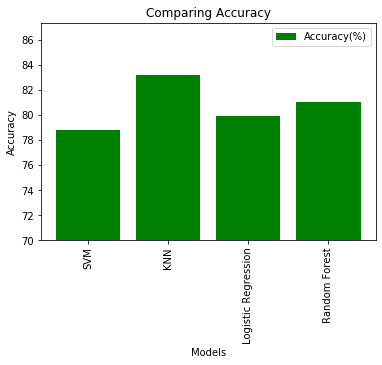

In [102]:
Model = ['SVM', 'KNN', 'Logistic Regression', 'Random Forest']
Accuracy = [svc_acc_per, knn_acc_per, lr_acc_per, rf_acc_per]
index = np.arange(len(Model))


plt.bar(index, Accuracy, label="Accuracy(%)", color = 'green')

plt.ylim(70)
plt.xticks(index, Model, rotation = '90')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparing Accuracy')
plt.legend()

### Hyperparameter tuning 

In [106]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X_test, y_test)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 3


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [117]:
# New KNN classification
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, leaf_size = 1, n_jobs = -1)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_acc_per = round(knn_acc, 3)*100
print('Accuracy after KNN Classification: ', knn_acc_per, '%')

Accuracy after KNN Classification:  83.2 %


In [122]:
n_estimators = [15,25,30,35]
criterion = ['gini','entropy']
max_depth = [2,4,6,None]
max_features = [2,3,'auto']

hyperparameters = dict(n_estimators = n_estimators, criterion = criterion, 
                       max_depth = max_depth, max_features = max_features )

rf_2 = RandomForestClassifier()

clf = GridSearchCV(rf_2, hyperparameters, scoring = 'accuracy', cv = 100)

best_model = clf.fit(X_train, y_train)

print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])

Best n_estimators: 30
Best criterion: gini
Best max_depth: 6
Best max_features: 3


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [127]:
rf = RandomForestClassifier(criterion='gini', n_estimators = 300, random_state = 0, n_jobs = -1, max_depth = 6, max_features = 3)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_acc_per = round(rf_acc, 3)*100
print('Accuracy after Random Forest Classification: ', rf_acc_per, '%')

Accuracy after Random Forest Classification:  81.0 %
